<a href="https://colab.research.google.com/github/Tirna2/IML/blob/main/Assignment_1%2Cquestion_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

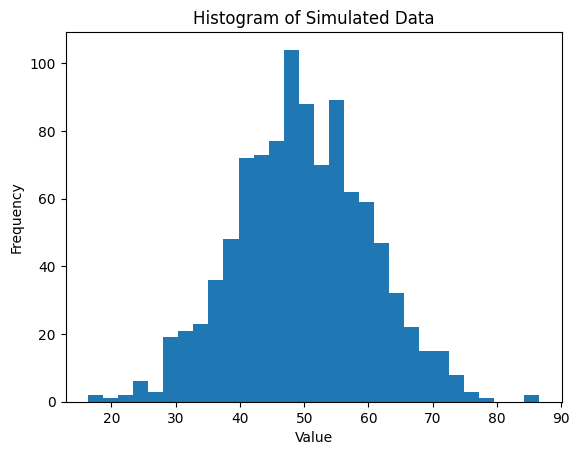

In [ ]:


import numpy as np
import matplotlib.pyplot as plt

# 1. Simulate the dataset
mu = 50
sigma = 10
samples = np.random.normal(loc=mu, scale=sigma, size=1000)

# 2. Plot the histogram
plt.hist(samples, bins=30)  # Adjust the number of bins as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Simulated Data')
plt.show()


MLE Estimate of mu: 49.37182783289936
MLE Estimate of sigma: 9.928981336637438


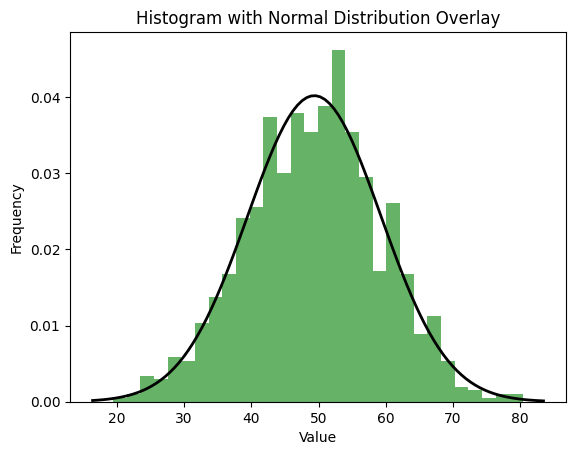

In [ ]:

import matplotlib.pyplot as plt
from scipy.stats import norm

# 1. Simulate the dataset (already provided)
mu = 50
sigma = 10
samples = np.random.normal(loc=mu, scale=sigma, size=1000)

# 2. Plot the histogram (already provided)
plt.hist(samples, bins=30, density=True, alpha=0.6, color='g')  # density=True for probability density
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Simulated Data')


# 3. Maximum Likelihood Estimation (MLE) for mean and standard deviation
# The MLE for the mean of a normal distribution is the sample mean
# The MLE for the standard deviation of a normal distribution is the sample standard deviation

mle_mu = np.mean(samples)
mle_sigma = np.std(samples)

print(f"MLE Estimate of mu: {mle_mu}")
print(f"MLE Estimate of sigma: {mle_sigma}")

# 4. Overlay the PDF
xmin, xmax = plt.xlim() # Get the x-axis limits from the histogram
x = np.linspace(xmin, xmax, 100) # Create a range of x-values
p = norm.pdf(x, mle_mu, mle_sigma) # Calculate the PDF at each x-value
plt.plot(x, p, 'k', linewidth=2) # Overlay the PDF on the histogram
plt.title('Histogram with Normal Distribution Overlay')
plt.show()


MLE Estimate of mu (with outliers): 53.89099558295428
MLE Estimate of sigma (with outliers): 19.448228783814642


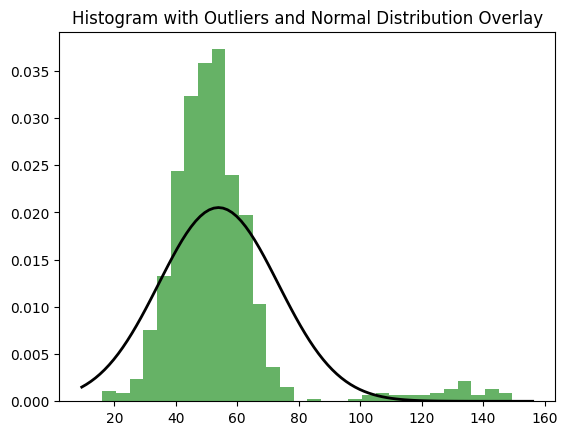


Indices of detected outliers:
(array([1000, 1001, 1002, 1003, 1004, 1005, 1007, 1008, 1009, 1010, 1011,
       1012, 1013, 1014, 1015, 1017, 1019, 1020, 1021, 1022, 1024, 1025,
       1027, 1028, 1029, 1030, 1032, 1033, 1034, 1035, 1036, 1037, 1038,
       1041, 1042, 1043, 1044, 1045, 1046, 1048, 1049]),)
Number of detected outliers: 41

Indices of outliers detected using IQR method:
(array([   5,  339,  414,  569,  607,  674,  837, 1000, 1001, 1002, 1003,
       1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014,
       1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025,
       1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036,
       1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047,
       1048, 1049]),)
Number of outliers detected by IQR method: 57


In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


mu = 50
sigma = 10
samples = np.random.normal(loc=mu, scale=sigma, size=1000)

# Introduce outliers
outliers = np.random.uniform(low=100, high=150, size=50)
samples_with_outliers = np.concatenate((samples, outliers))

# 2. Fit a normal distribution to the dataset with outliers using MLE
mle_mu_outliers = np.mean(samples_with_outliers)
mle_sigma_outliers = np.std(samples_with_outliers)

print(f"MLE Estimate of mu (with outliers): {mle_mu_outliers}")
print(f"MLE Estimate of sigma (with outliers): {mle_sigma_outliers}")

# 3. Compare and discuss the effect of outliers
# The mean and standard deviation with outliers are going to be larger than the original
# sample statistics.  This demonstrates that outliers can heavily skew the MLE.


# 4. Plot the histogram with outliers
plt.hist(samples_with_outliers, bins=30, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mle_mu_outliers, mle_sigma_outliers)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Histogram with Outliers and Normal Distribution Overlay')
plt.show()


# Outlier detection using z-scores
# Calculate z-scores
z_scores = np.abs((samples_with_outliers - mle_mu_outliers) / mle_sigma_outliers)

# Set a threshold for outlier detection (e.g., z-score > 3)
threshold = 3
outlier_indices = np.where(z_scores > threshold)

# Print indices of outliers
print("\nIndices of detected outliers:")
print(outlier_indices)
print(f"Number of detected outliers: {len(outlier_indices[0])}")

# Alternatively, use IQR method:
Q1 = np.percentile(samples_with_outliers, 25)
Q3 = np.percentile(samples_with_outliers, 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

iqr_outlier_indices = np.where((samples_with_outliers < lower_bound) | (samples_with_outliers > upper_bound))

print("\nIndices of outliers detected using IQR method:")
print(iqr_outlier_indices)

print(f"Number of outliers detected by IQR method: {len(iqr_outlier_indices[0])}")
